In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nbodywork import Particles, NBodySimulator
from nbodywork import load_files, save_movie, save_movie_outer, save_movie_inner
from numba import set_num_threads
from numba import jit, njit, prange

In [2]:
nthreads = 12
set_num_threads(nthreads)

In [3]:
time = 0
AU = 149597870895          #天文單位換算成米

Earth_Mass = 5.972e24
num_particles = 9             #np.randam.normal(平均值，標準差，output樣式)
mass = np.array([332900*Earth_Mass,0.055*Earth_Mass,0.815*Earth_Mass,1*Earth_Mass,0.10744*Earth_Mass,317.82*Earth_Mass,95.16*Earth_Mass,14.371*Earth_Mass,17.147*Earth_Mass])      #np.fall(陣列大小，每一個數值為何)
position = np.array([[0,0,0],[0.4*AU,0,0],[0.7*AU,0,0],[AU,0,0],[1.5*AU,0,0],[5.2*AU,0,0],[9.5*AU,0,0],[19.2*AU,0,0],[30.1*AU,0,0]])
velocity = np.array([[0,0,0],[0,47870,0],[0,35020,0],[0,29780,0],[0,24130,0],[0,13070,0],[0,9690,0],[0,6810,0],[0,5430,0]])
accleration = np.zeros((num_particles,3))
tag = np.linspace(1,num_particles,num_particles)

In [4]:
particles = Particles(N = num_particles)             #將設好的初始值丟入particles class
particles.mass = mass
particles.position = position
particles.velocity = velocity
particles.acceleration = accleration
particles.tag = tag

running 全部


n 0 Time 0 dt: 8645.733150684931
n 30 Time 259371.99452054812 dt: 8645.733150684931
n 60 Time 518743.9890410956 dt: 8645.733150684931
n 90 Time 778115.9835616448 dt: 8645.733150684931
n 120 Time 1037487.978082194 dt: 8645.733150684931
n 150 Time 1296859.9726027432 dt: 8645.733150684931
n 180 Time 1556231.9671232924 dt: 8645.733150684931
n 210 Time 1815603.9616438416 dt: 8645.733150684931
n 240 Time 2074975.9561643908 dt: 8645.733150684931
n 270 Time 2334347.9506849335 dt: 8645.733150684931
n 300 Time 2593719.9452054757 dt: 8645.733150684931
n 330 Time 2853091.939726018 dt: 8645.733150684931
n 360 Time 3112463.93424656 dt: 8645.733150684931
n 390 Time 3371835.9287671023 dt: 8645.733150684931
n 420 Time 3631207.9232876445 dt: 8645.733150684931
n 450 Time 3890579.9178081867 dt: 8645.733150684931
n 480 Time 4149951.912328729 dt: 8645.733150684931
n 510 Time 4409323.906849283 dt: 8645.733150684931
n 540 Time 4668695.901369839 dt: 8645.733150684931
n 570 Time 4928067.895890395 dt: 8645.73315

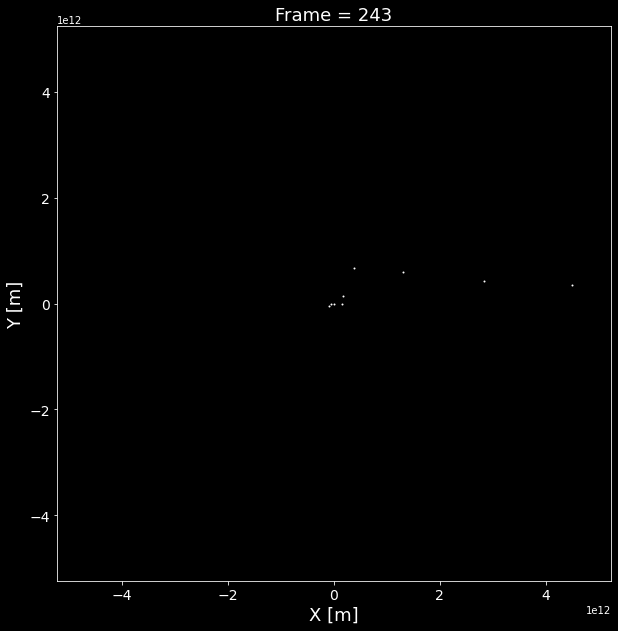

In [5]:
one_year = 31556926
simulation = NBodySimulator(particles=particles)
simulation.setup(G=6.6743e-11, rsoft=1e-10, method='rk2',outfreq=30)  #因為dt=0.01,所以若要2秒一個數據則頻率為200*dt=2
simulation.evolve(dt = one_year/3650, tmax = 2*one_year)
fns = load_files('nbody')
print(fns)
save_movie(fns, lengthscale=35*AU,filename='nbody_earth_sun.mp4', fps=20)

Only running 水星、金星、地球、火星

n 0 Time 0 dt: 8645.733150684931
n 30 Time 259371.99452054812 dt: 8645.733150684931
n 60 Time 518743.9890410956 dt: 8645.733150684931
n 90 Time 778115.9835616448 dt: 8645.733150684931
n 120 Time 1037487.978082194 dt: 8645.733150684931
n 150 Time 1296859.9726027432 dt: 8645.733150684931
n 180 Time 1556231.9671232924 dt: 8645.733150684931
n 210 Time 1815603.9616438416 dt: 8645.733150684931
n 240 Time 2074975.9561643908 dt: 8645.733150684931
n 270 Time 2334347.9506849335 dt: 8645.733150684931
n 300 Time 2593719.9452054757 dt: 8645.733150684931
n 330 Time 2853091.939726018 dt: 8645.733150684931
n 360 Time 3112463.93424656 dt: 8645.733150684931
n 390 Time 3371835.9287671023 dt: 8645.733150684931
n 420 Time 3631207.9232876445 dt: 8645.733150684931
n 450 Time 3890579.9178081867 dt: 8645.733150684931
n 480 Time 4149951.912328729 dt: 8645.733150684931
n 510 Time 4409323.906849283 dt: 8645.733150684931
n 540 Time 4668695.901369839 dt: 8645.733150684931
n 570 Time 4928067.895890395 dt: 8645.73315

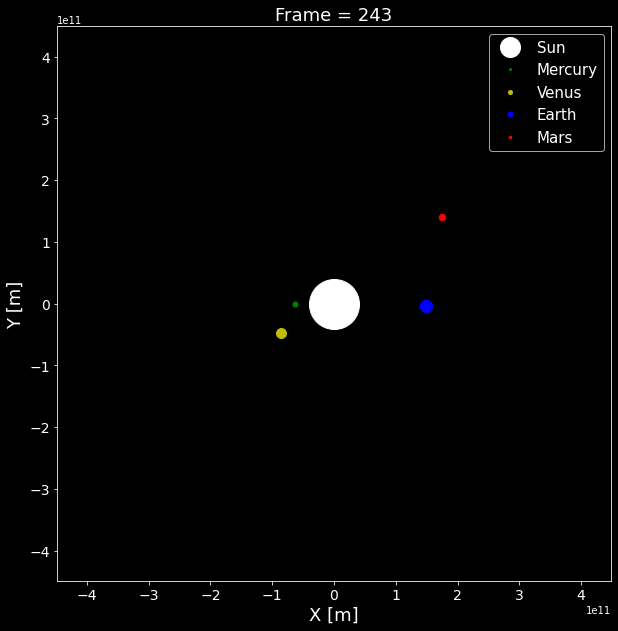

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nbodywork import Particles, NBodySimulator
from nbodywork import load_files, save_movie, save_movie_outer, save_movie_inner
from numba import set_num_threads
from numba import jit, njit, prange

nthreads = 12
set_num_threads(nthreads)

time = 0
AU = 149597870895          #天文單位換算成米

Earth_Mass = 5.972e24
num_particles = 9             #np.randam.normal(平均值，標準差，output樣式)
mass = np.array([332900*Earth_Mass,0.055*Earth_Mass,0.815*Earth_Mass,1*Earth_Mass,0.10744*Earth_Mass,317.82*Earth_Mass,95.16*Earth_Mass,14.371*Earth_Mass,17.147*Earth_Mass])      #np.fall(陣列大小，每一個數值為何)
position = np.array([[0,0,0],[0.4*AU,0,0],[0.7*AU,0,0],[AU,0,0],[1.5*AU,0,0],[5.2*AU,0,0],[9.5*AU,0,0],[19.2*AU,0,0],[30.1*AU,0,0]])
velocity = np.array([[0,0,0],[0,47870,0],[0,35020,0],[0,29780,0],[0,24130,0],[0,13070,0],[0,9690,0],[0,6810,0],[0,5430,0]])
accleration = np.zeros((num_particles,3))
tag = np.linspace(1,num_particles,num_particles)

particles = Particles(N = num_particles)             #將設好的初始值丟入particles class
particles.mass = mass
particles.position = position
particles.velocity = velocity
particles.acceleration = accleration
particles.tag = tag

one_year = 31556926
simulation = NBodySimulator(particles=particles)
simulation.setup(G=6.6743e-11, rsoft=1e-10, method='rk2',outfreq=30)  #因為dt=0.01,所以若要2秒一個數據則頻率為200*dt=2
simulation.evolve(dt = one_year/3650, tmax = one_year*2)

fns = load_files('nbody')
print(fns)
save_movie_inner(fns, lengthscale=3*AU,filename='nbody_inner_sun.mp4', fps=20)

for 木星 土星 天王星 海王星

n 0 Time 0 dt: 8645.733150684931
n 30 Time 259371.99452054812 dt: 8645.733150684931
n 60 Time 518743.9890410956 dt: 8645.733150684931
n 90 Time 778115.9835616448 dt: 8645.733150684931
n 120 Time 1037487.978082194 dt: 8645.733150684931
n 150 Time 1296859.9726027432 dt: 8645.733150684931
n 180 Time 1556231.9671232924 dt: 8645.733150684931
n 210 Time 1815603.9616438416 dt: 8645.733150684931
n 240 Time 2074975.9561643908 dt: 8645.733150684931
n 270 Time 2334347.9506849335 dt: 8645.733150684931
n 300 Time 2593719.9452054757 dt: 8645.733150684931
n 330 Time 2853091.939726018 dt: 8645.733150684931
n 360 Time 3112463.93424656 dt: 8645.733150684931
n 390 Time 3371835.9287671023 dt: 8645.733150684931
n 420 Time 3631207.9232876445 dt: 8645.733150684931
n 450 Time 3890579.9178081867 dt: 8645.733150684931
n 480 Time 4149951.912328729 dt: 8645.733150684931
n 510 Time 4409323.906849283 dt: 8645.733150684931
n 540 Time 4668695.901369839 dt: 8645.733150684931
n 570 Time 4928067.895890395 dt: 8645.73315

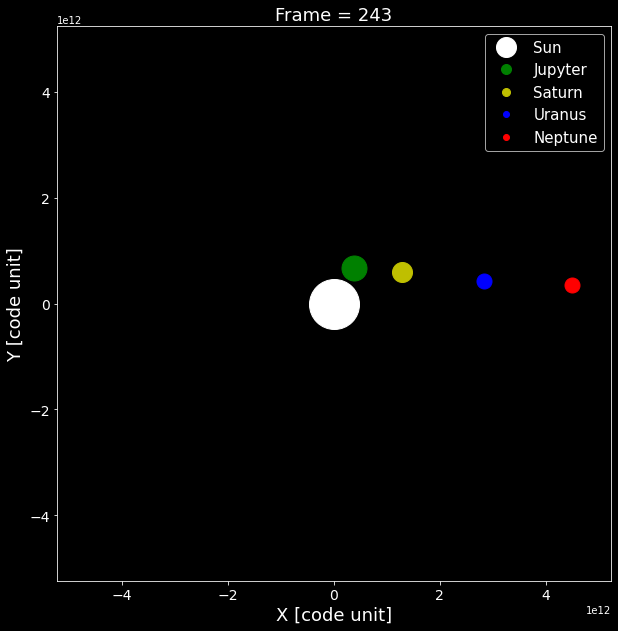

In [3]:
time = 0
AU = 149597870895          #天文單位換算成米

Earth_Mass = 5.972e24
num_particles = 9             #np.randam.normal(平均值，標準差，output樣式)
mass = np.array([332900*Earth_Mass,317.82*Earth_Mass,95.16*Earth_Mass,14.371*Earth_Mass,17.147*Earth_Mass,0.055*Earth_Mass,0.815*Earth_Mass,1*Earth_Mass,0.10744*Earth_Mass])      #np.fall(陣列大小，每一個數值為何)
position = np.array([[0,0,0],[5.2*AU,0,0],[9.5*AU,0,0],[19.2*AU,0,0],[30.1*AU,0,0],[0.4*AU,0,0],[0.7*AU,0,0],[AU,0,0],[1.5*AU,0,0]])
velocity = np.array([[0,0,0],[0,13070,0],[0,9690,0],[0,6810,0],[0,5430,0],[0,47870,0],[0,35020,0],[0,29780,0],[0,24130,0]])
accleration = np.zeros((num_particles,3))
tag = np.linspace(1,num_particles,num_particles)

particles = Particles(N = num_particles)             #將設好的初始值丟入particles class
particles.mass = mass
particles.position = position
particles.velocity = velocity
particles.acceleration = accleration
particles.tag = tag

one_year = 31556926
simulation = NBodySimulator(particles=particles)
simulation.setup(G=6.6743e-11, rsoft=1e-10, method='rk2',outfreq=30)  #因為dt=0.01,所以若要2秒一個數據則頻率為200*dt=2
simulation.evolve(dt = one_year/3650, tmax = 2*one_year)

fns = load_files('nbody')
print(fns)
save_movie_outer(fns, lengthscale=35*AU,filename='nbody_outer_sun.mp4', fps=20)